In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

df = pd.read_csv('clean_commit_data.csv')

### 1. Số lượng commits phân bố theo thời gian 

#### Tổng số commit

In [2]:
total_commits = len(df)
total_commits

16255

#### Số lượng commit phân bố theo từng năm

In [3]:
commits_per_year = df.groupby('Year')['Commit ID'].count().reset_index()
commits_per_year.columns = ['Year', 'Number of Commits']
commits_per_year

,Year,Number of Commits
0,2013,45
1,2014,295
2,2015,339
3,2016,2642
4,2017,2710
5,2018,1762
6,2019,1239
7,2020,1371
8,2021,1101
9,2022,1558


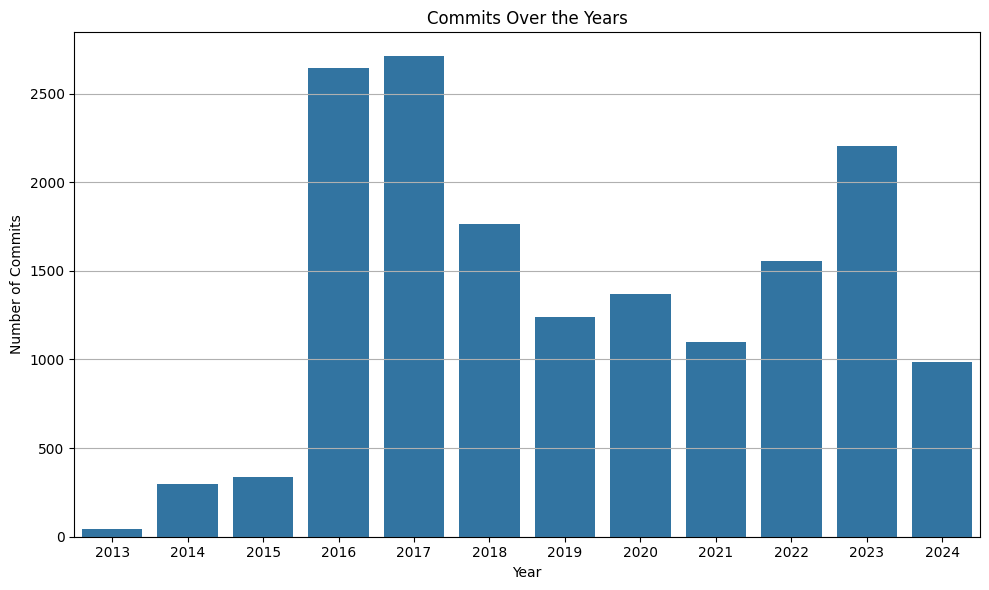

In [4]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=commits_per_year, x='Year', y='Number of Commits')
plt.xlabel('Year')
plt.ylabel('Number of Commits')
plt.title('Commits Over the Years')
plt.grid(True, axis='y')
plt.tight_layout()

### 2. Sự thay đổi của các file

#### Tổng số lần thay đổi của tất cả các file

In [5]:
total_files_changed = df['Num Changed Files'].sum()
total_files_changed

69463

#### Số file thay đổi trung bình của mỗi commit

In [6]:
average_files_changed = df['Num Changed Files'].mean()
average_files_changed

4.273331282682252

##### File thay đổi nhiều nhất qua các commit

In [7]:
df['Files Changed'] = df['Files Changed'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
df_exploded = df.explode('Files Changed')
file_counts = df_exploded['Files Changed'].value_counts()
file_counts_df = file_counts.reset_index()
file_counts_df.columns = ['File Name', 'Change Count']
file_counts_df = file_counts_df.sort_values(by='Change Count', ascending=False).reset_index(drop=True)
top_files = file_counts_df.head(10)
top_files

,File Name,Change Count
0,packaging/version,1582
1,CHANGELOG.md,1539
2,web/index.html,796
3,README.md,570
4,netdata-installer.sh,547
5,web/dashboard.js,540
6,configs.signatures,403
7,CMakeLists.txt,397
8,Makefile.am,369
9,configure.ac,354


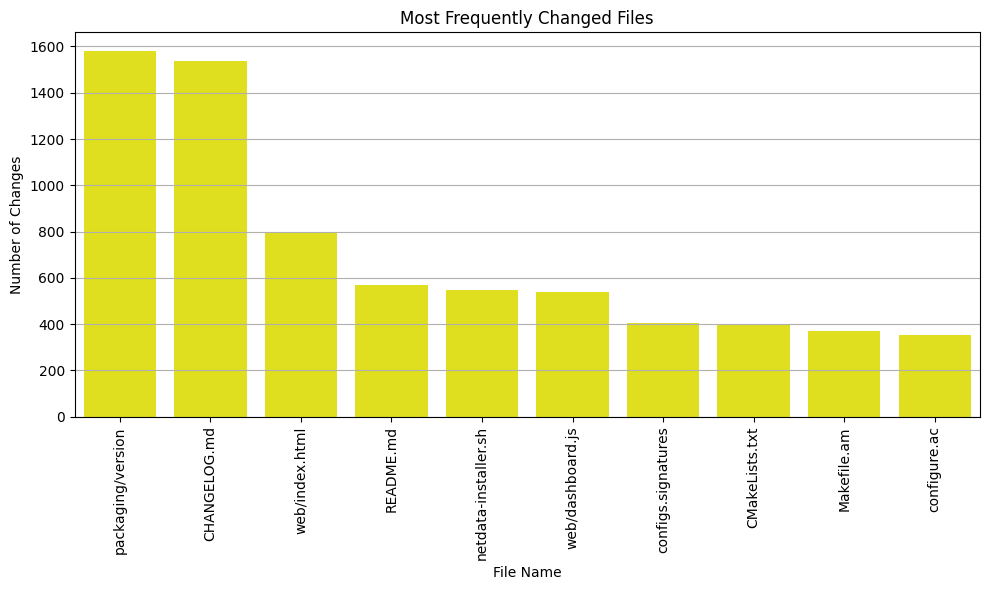

In [8]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=file_counts_df.head(10), x='File Name', y='Change Count', color='yellow')
plt.xlabel('File Name')
plt.ylabel('Number of Changes')
plt.title('Most Frequently Changed Files')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()

#### Số lượng file thay đổi nhiều nhất trong một lần commit

In [9]:
most_changed_commits = df.sort_values(by='Num Changed Files', ascending=False).reset_index()
cols_to_display = ['Commit Date', 'Author Name', 'Num Changed Files']
most_changed_commits[cols_to_display].head(10)

,Commit Date,Author Name,Num Changed Files
0,2024-02-13 11:56:20+00:00,Austin S. Hemmelgarn,300
1,2024-02-01 11:41:44+00:00,vkalintiris,300
2,2024-05-21 09:58:32+00:00,Fotis Voutsas,300
3,2024-02-08 09:06:35+00:00,vkalintiris,300
4,2023-11-08 08:59:31+00:00,Ilya Mashchenko,300
5,2024-02-07 00:24:47+00:00,vkalintiris,300
6,2018-07-10 07:38:35+00:00,Robert,300
7,2018-05-31 19:33:12+00:00,Austin S. Hemmelgarn,300
8,2023-10-02 13:09:55+00:00,Netdata bot,300
9,2024-02-26 14:10:14+00:00,Austin S. Hemmelgarn,300


### 3. Phân tích các contributors

#### Tổng số contributors

In [10]:
count_contributors = df['Author Name'].nunique()
count_contributors

643

#### Những người đóng góp tích cực nhât

In [11]:
df_contributor_counts = df['Author Name'].value_counts().to_frame().reset_index()
df_contributor_counts.columns = ['Author Name', 'Commits Count']
df_contributor_counts.head(10)      

,Author Name,Commits Count
0,Costa Tsaousis (ktsaou),3279
1,Costa Tsaousis,2713
2,netdatabot,1646
3,Ilya Mashchenko,1144
4,Austin S. Hemmelgarn,937
5,Stelios Fragkakis,418
6,Chris Akritidis,384
7,Vladimir Kobal,375
8,paulfantom,355
9,thiagoftsm,337


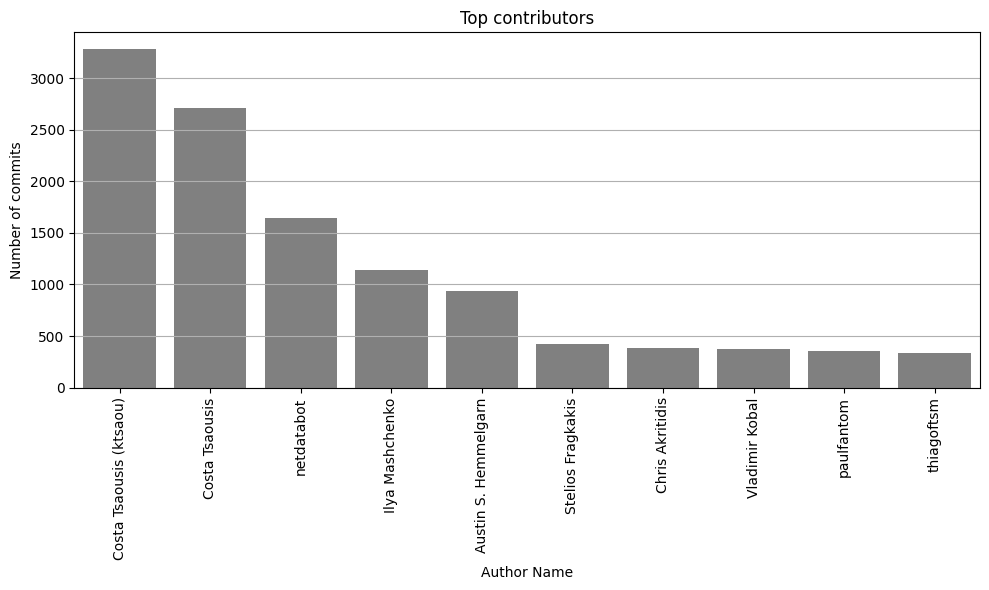

In [12]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=df_contributor_counts.head(10), x='Author Name', y='Commits Count', color='grey')
plt.ylabel('Number of commits')
plt.title('Top contributors')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()

#### Những người đó đóng góp bao nhiêu phần trăm trong tổng số commit

Text(0.5, 1.0, 'Percentage of Commit Time')

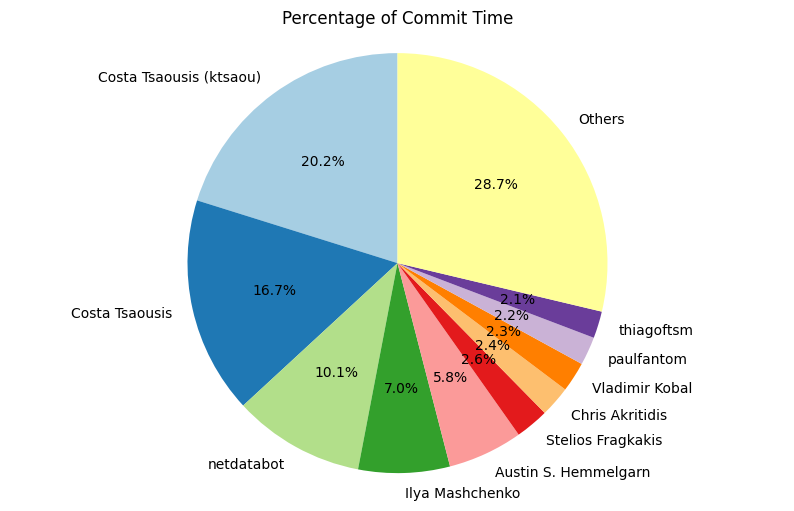

In [13]:
top_contributors = df_contributor_counts.head(10)
other_contributors = df_contributor_counts.iloc[10:]
others_commit_count = other_contributors['Commits Count'].sum()
others_df = pd.DataFrame({'Author Name': ['Others'], 'Commits Count': [others_commit_count]})
final_df = pd.concat([top_contributors, others_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(final_df['Commits Count'], labels=final_df['Author Name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.axis('equal')
plt.title('Percentage of Commit Time')

#### Người thay đổi nhiều file nhất 

In [14]:
total_files_changed = df.groupby('Author Name')['Num Changed Files'].sum().to_frame()
df_contributor_counts.columns = ['Author Name', 'Num Changed Files']
total_files_changed_sorted = total_files_changed.sort_values(by='Num Changed Files' ,ascending=False).reset_index()
total_files_changed_sorted.head(10)  


,Author Name,Num Changed Files
0,Costa Tsaousis,14600
1,Ilya Mashchenko,8045
2,Costa Tsaousis (ktsaou),7771
3,Austin S. Hemmelgarn,4466
4,vkalintiris,3696
5,netdatabot,3110
6,Fotis Voutsas,2726
7,thiagoftsm,2476
8,Netdata bot,2249
9,Joel Hans,1663


#### Những người đó đóng góp bao nhiêu phần trăm tổng số lần thay đổi file

Text(0.5, 1.0, 'Percentage of Num Changed Files')

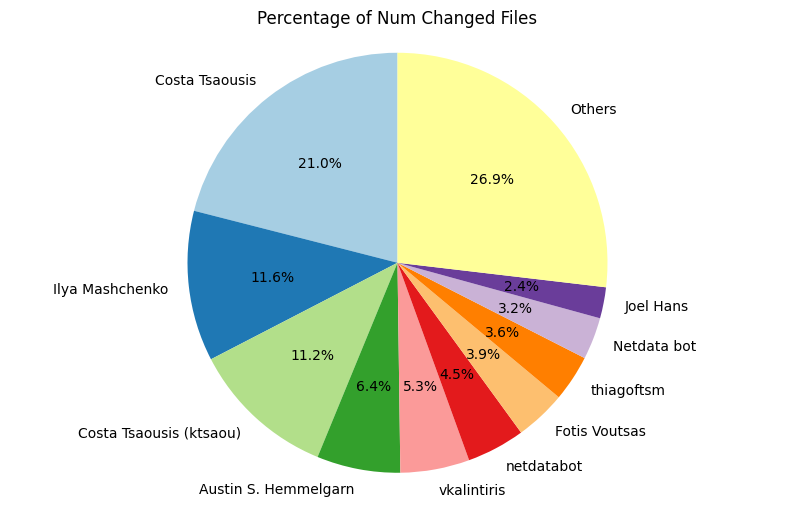

In [15]:
top_files_changed = total_files_changed_sorted.head(10)
other_files_changed = total_files_changed_sorted.iloc[10:]
others_files_changed_count = other_files_changed['Num Changed Files'].sum()
others_files_changed_df = pd.DataFrame({'Author Name': ['Others'], 'Num Changed Files': [others_files_changed_count]})
final_df = pd.concat([top_files_changed, others_files_changed_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(final_df['Num Changed Files'], labels=final_df['Author Name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.axis('equal')
plt.title('Percentage of Num Changed Files')

#### Thời gian hoạt động của các contributors trong ngày

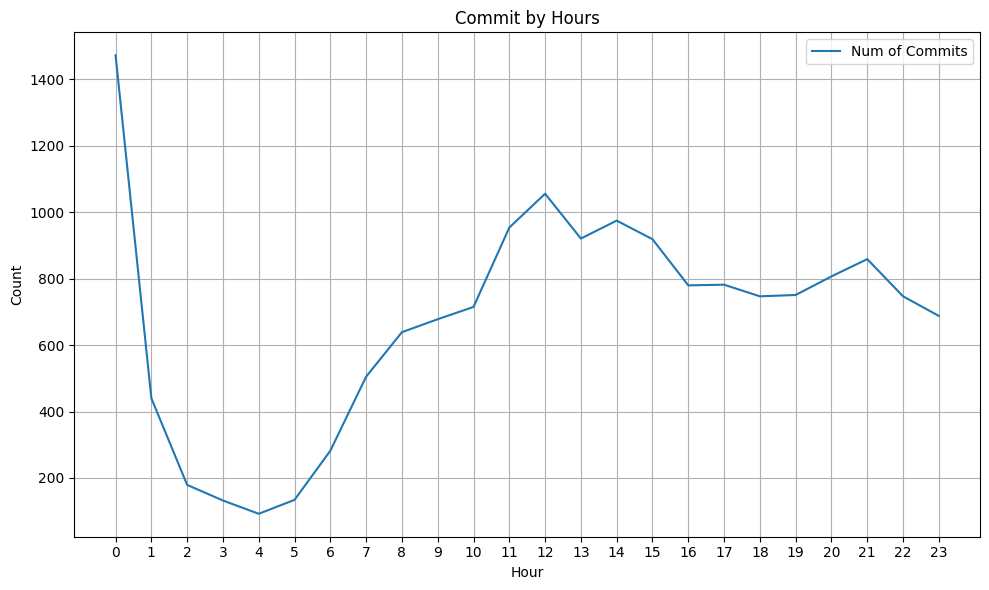

In [16]:
commit_counts_by_hour = df['Hour'].value_counts().sort_index()
commit_counts_df = commit_counts_by_hour.reset_index()
commit_counts_df.columns = ['Hour', 'Count']
plt.figure(figsize=(10, 6))
sns.lineplot(data=commit_counts_df, x='Hour', y='Count', label='Num of Commits')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Commit by Hours')
plt.grid()
plt.xticks(range(24))
plt.tight_layout()

### 4. Phân tích commit message

#### Những từ xuất hiện nhiều nhất trong commit message

In [17]:
all_messages = ' '.join(df['Commit Message'])
words = re.findall(r'\b\w+\b', all_messages.lower())
word_counts = Counter(words)
word_freq = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_freq = word_freq.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
word_freq.head(15)

,Word,Frequency
0,to,8552
1,the,7930
2,and,5633
3,for,5409
4,update,4615
5,fix,4570
6,in,3896
7,add,3582
8,of,3388
9,from,3158


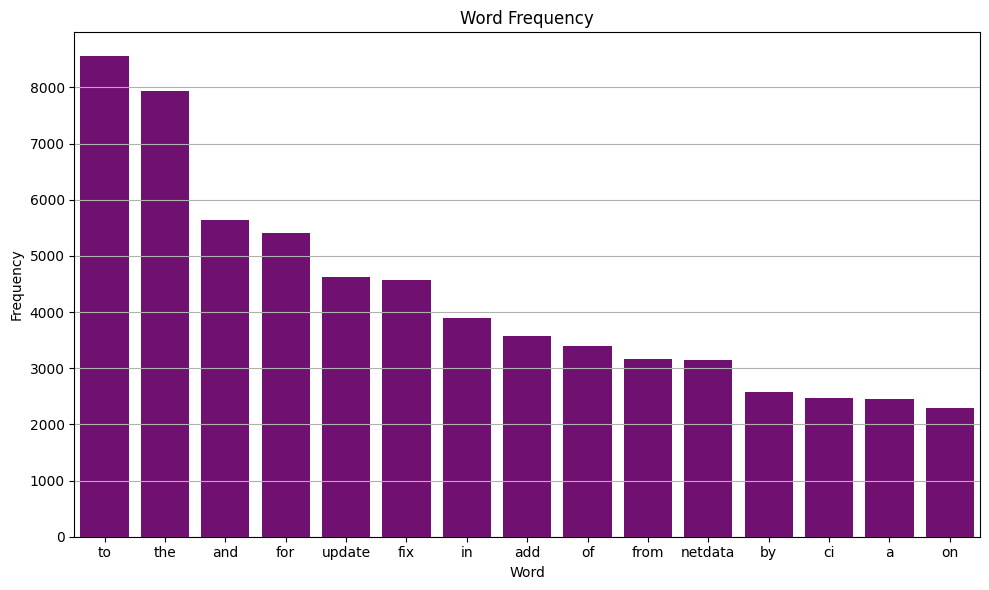

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq.head(15), x='Word', y='Frequency', color='purple')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.grid(True, axis='y')
plt.tight_layout()

### 5. Phân tích cột Author Email

#### Tổng số email

In [19]:
count_emails = df['Author Email'].nunique()
count_emails

660

#### Các đuôi email thông dụng nhất

In [20]:
df_emails = df.drop_duplicates(subset=['Author Email'])
df_emails['Email Type'] = df_emails['Author Email'].apply(lambda x: x.split('@')[-1])
email_counts = Counter(df_emails['Email Type'])
email_freq_df = pd.DataFrame(email_counts.items(), columns=['Email Type', 'Num of Commits'])
email_freq_df = email_freq_df.sort_values(by='Num of Commits', ascending=False).reset_index(drop=True)
email_freq_df.head(10)

C:\Users\dungp\AppData\Local\Temp\ipykernel_11988\273962582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emails['Email Type'] = df_emails['Author Email'].apply(lambda x: x.split('@')[-1])


,Email Type,Num of Commits
0,gmail.com,188
1,users.noreply.github.com,185
2,netdata.cloud,19
3,outlook.com,8
4,hotmail.com,6
5,yahoo.com,4
6,protonmail.ch,2
7,protonmail.com,2
8,localhost.localdomain,2
9,yahoo.fr,2


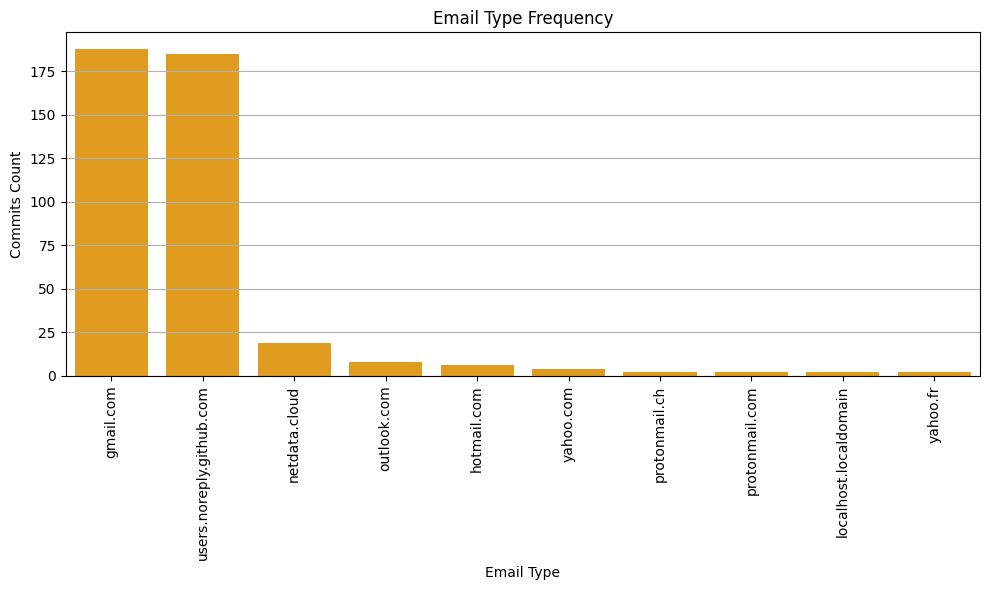

In [21]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=email_freq_df.head(10), x='Email Type', y='Num of Commits', color='orange')
plt.xlabel('Email Type')
plt.ylabel('Commits Count')
plt.title('Email Type Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()

### 6. Sự tăng trưởng của repo qua từng năm

#### Số lượng commits

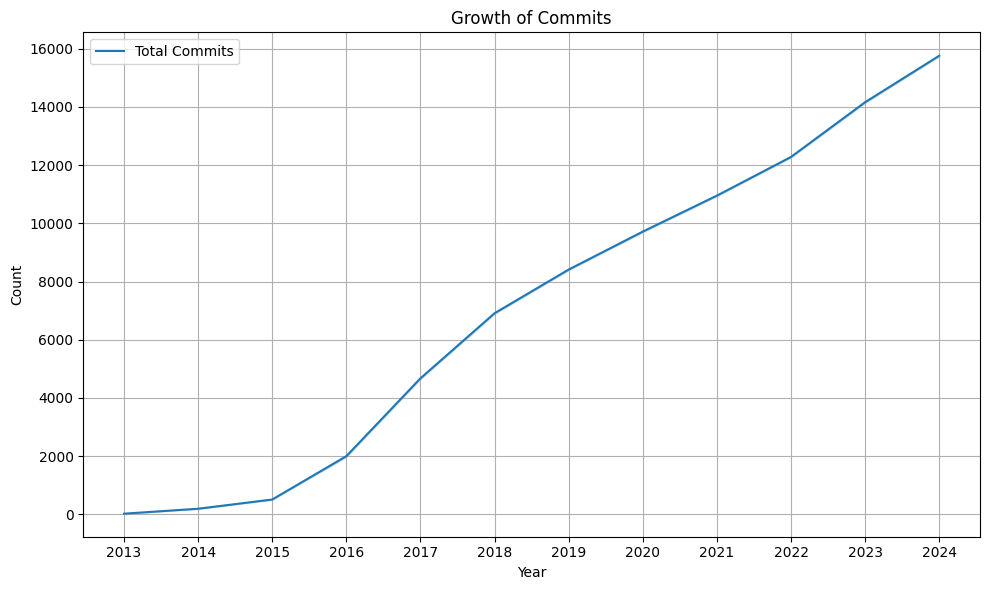

In [22]:
df_by_year = df.sort_values(by='Year')
df_by_year['Commits'] = range(1, len(df) + 1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_by_year, x='Year', y='Commits', label='Total Commits')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Growth of Commits')
plt.grid()
plt.xticks(range(2013, 2025), rotation=0)
plt.tight_layout()

#### Số lượng contributors

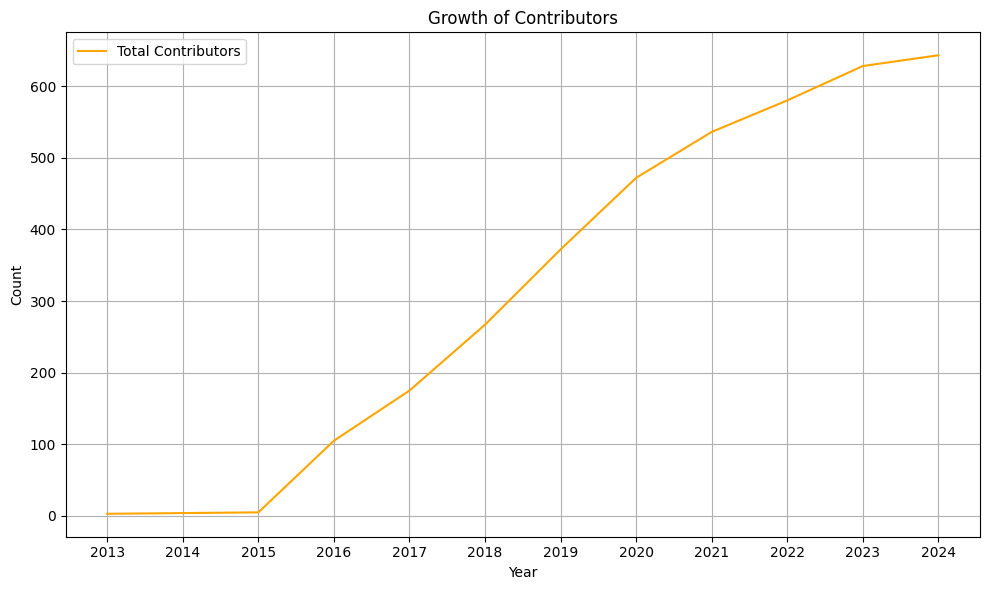

In [23]:
contributors_set = set()
contributors = []
for year, group in df_by_year.groupby('Year'):
    contributors_set.update(group['Author Name'].unique())
    contributors.append(len(contributors_set))
df_contributors = pd.DataFrame({
    'Year': sorted(df_by_year['Year'].unique()),
    'Cumulative Contributors': contributors
})
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_contributors, x='Year', y='Cumulative Contributors', color = 'orange', label='Total Contributors')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Growth of Contributors')
plt.grid()
plt.xticks(range(2013, 2025), rotation=0)
plt.tight_layout()